Mudanças em relação ao v1

- Usados novos dados com outros tratamentos do thaler
- Usadas colunas com tratamento de variância
- Aumentado o tempo máximo usado no treinamento de 19 horas pra 21 horas e mínimo para 1 hora
- Incluido as colunas CorrenteVariancia , VibracaoCalotaInferiorVariancia , VibracaoCalotaSuperiorVariancia, Vazao no treinamento
- Aplicado StandardScaler (desvio padrão 1, média 0) no fim do tratamento
- Exportado tabela para cada amostra com os resultados dos clusters para cada feature treinada

Mudanças em relação ao v2

- Usando novos dados processados em Abril, que incluem o RMS e Curtose dos filtros lowpass, bandpass e highpass para os dados de Vibração Calota Inferior





In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import DBSCAN

from matplotlib import pyplot

import warnings  #ignorar mensagem ao rodar uma célula

figsize=(8, 6)

# habilita o modo offline
import plotly
import plotly.offline as py
from plotly.offline import plot, iplot
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)
# habilita o renderizador do colab
import plotly.io as pio
pio.renderers
pio.renderers.default = "colab"

In [ ]:
sns.set(palette='bright',color_codes=True,style='whitegrid')    


In [ ]:

a3_1_antigo = pd.read_csv('/content/drive/My Drive/Nicolas/2021_04 - Dados processados/A3_N_2019_12_04tAm2.5.csv')
a3_2_antigo = pd.read_csv('/content/drive/My Drive/Nicolas/2021_04 - Dados processados/A3_A_2019_12_09tAm11.8.csv')


# a3_1 = pd.read_csv('/content/drive/My Drive/Nicolas/2021_04 - Dados processados/A3_N_2019_12_04tAm2.5.csv')
# a3_2 = pd.read_csv('/content/drive/My Drive/Nicolas/2021_04 - Dados processados/A3_A_2019_12_09tAm11.8.csv')
# a3_3 = pd.read_csv('/content/drive/My Drive/Nicolas/2021_04 - Dados processados/A3_A_2019_12_11tAm2.5.csv')

# a4_1 = pd.read_csv('/content/drive/My Drive/Nicolas/2021_04 - Dados processados/A4_N_2019_12_16tAm2.1.csv')
# a4_2 = pd.read_csv('/content/drive/My Drive/Nicolas/2021_04 - Dados processados/A4_A_2019_12_19tAm6.csv')
# a4_3 = pd.read_csv('/content/drive/My Drive/Nicolas/2021_04 - Dados processados/A4_A_2020_01_06tAm2.5.csv')
# a4_4 = pd.read_csv('/content/drive/My Drive/Nicolas/2021_04 - Dados processados/A4_A_2020_01_13tAm2.5.csv')

# a5_1 = pd.read_csv('/content/drive/My Drive/Nicolas/2021_04 - Dados processados/A5_N_2020_01_22tAm2.5.csv')
# a5_2 = pd.read_csv('/content/drive/My Drive/Nicolas/2021_04 - Dados processados/A5_A_2020_01_27tAm12.5.csv')
# a5_3 = pd.read_csv('/content/drive/My Drive/Nicolas/2021_04 - Dados processados/A5_A_2020_01_28tAm2.5.csv')

# b5_1 = pd.read_csv('/content/drive/My Drive/Nicolas/2021-04 - Dados Processados_Am B/B5_N_2020_10_16tAm0.csv')
# b5_2 = pd.read_csv('/content/drive/My Drive/Nicolas/2021-04 - Dados Processados_Am B/B5_A_2020_10_22tAm0.csv')
# b5_3 = pd.read_csv('/content/drive/My Drive/Nicolas/2021-04 - Dados Processados_Am B/B5_A_2020_10_27tAm0.csv')

# b10_1 = pd.read_csv('/content/drive/My Drive/Nicolas/2021-04 - Dados Processados_Am B/B10_N_2021_03_22tAm0.csv')
# b10_2 = pd.read_csv('/content/drive/My Drive/Nicolas/2021-04 - Dados Processados_Am B/B10_A_2021_03_25tAm0.csv')
# b10_3 = pd.read_csv('/content/drive/My Drive/Nicolas/2021-04 - Dados Processados_Am B/B10_A_2021_03_30tAm0.csv')

# b11_1 = pd.read_csv('/content/drive/My Drive/Nicolas/2021-04 - Dados Processados_Am B/B11_N_2021_04_05tAm0.csv')
# b11_2 = pd.read_csv('/content/drive/My Drive/Nicolas/2021-04 - Dados Processados_Am B/B11_A_2021_04_08tAm0.csv')
# b11_3 = pd.read_csv('/content/drive/My Drive/Nicolas/2021-04 - Dados Processados_Am B/B11_A_2021_04_22tAm0.csv')

# a2 ok 

# b7 ok

# b8 ok

# b12 ok

# b15 ok

#NOVO
a2_1 = pd.read_csv('/content/drive/My Drive/Nicolas/2021-08 - Dados Processados Completo (Dissertação)/A2_N_2019_07_09tAm0.csv')
a2_3 = pd.read_csv('/content/drive/My Drive/Nicolas/2021-08 - Dados Processados Completo (Dissertação)/A2_A_2019_08_08tAm0.csv')
a2_2 = pd.read_csv('/content/drive/My Drive/Nicolas/2021-08 - Dados Processados Completo (Dissertação)/A2_A_2019_08_28tAm0.csv')

a3_1 = pd.read_csv('/content/drive/My Drive/Nicolas/2021-08 - Dados Processados Completo (Dissertação)/A3_N_2019_12_04tAm0.csv')
a3_3 = pd.read_csv('/content/drive/My Drive/Nicolas/2021-08 - Dados Processados Completo (Dissertação)/A3_A_2019_12_11tAm0.csv')
a3_2 = pd.read_csv('/content/drive/My Drive/Nicolas/2021-08 - Dados Processados Completo (Dissertação)/A3_A_2019_12_09tAm0.csv')

a4_1 = pd.read_csv('/content/drive/My Drive/Nicolas/2021-08 - Dados Processados Completo (Dissertação)/A4_N_2019_12_16tAm0.csv')
a4_2 = pd.read_csv('/content/drive/My Drive/Nicolas/2021-08 - Dados Processados Completo (Dissertação)/A4_A_2019_12_19tAm0.csv')
a4_3 = pd.read_csv('/content/drive/My Drive/Nicolas/2021-08 - Dados Processados Completo (Dissertação)/A4_A_2020_01_06tAm0.csv')
# a4_4 = pd.read_csv('/content/drive/My Drive/Nicolas/2021-05 - Dados Processados Artigo C_Bias/A4_A_2020_01_13tAm0.csv')

a5_1 = pd.read_csv('/content/drive/My Drive/Nicolas/2021-08 - Dados Processados Completo (Dissertação)/A5_N_2020_01_22tAm0.csv')
a5_2 = pd.read_csv('/content/drive/My Drive/Nicolas/2021-08 - Dados Processados Completo (Dissertação)/A5_A_2020_01_27tAm0.csv')
a5_3 = pd.read_csv('/content/drive/My Drive/Nicolas/2021-08 - Dados Processados Completo (Dissertação)/A5_A_2020_01_28tAm0.csv')
                                                                                                          # B5_N_2020_10_16tAm0
b5_1 = pd.read_csv('/content/drive/My Drive/Nicolas/2021-08 - Dados Processados Completo (Dissertação)/B5_N_2020_10_16tAm0.csv')
b5_2 = pd.read_csv('/content/drive/My Drive/Nicolas/2021-08 - Dados Processados Completo (Dissertação)/B5_A_2020_10_22tAm0.csv')
b5_3 = pd.read_csv('/content/drive/My Drive/Nicolas/2021-08 - Dados Processados Completo (Dissertação)/B5_A_2020_10_27tAm0.csv')

#NOVO
b7_1 = pd.read_csv('/content/drive/My Drive/Nicolas/2021-08 - Dados Processados Completo (Dissertação)/B7_N_2021_02_05tAm0.csv')
b7_2 = pd.read_csv('/content/drive/My Drive/Nicolas/2021-08 - Dados Processados Completo (Dissertação)/B7_A_2021_02_08tAm0.csv')
b7_3 = pd.read_csv('/content/drive/My Drive/Nicolas/2021-08 - Dados Processados Completo (Dissertação)/B7_A_2021_02_15tAm0.csv')

#NOVO
b8_1 = pd.read_csv('/content/drive/My Drive/Nicolas/2021-08 - Dados Processados Completo (Dissertação)/B8_N_2021_02_18tAm0.csv')
b8_2 = pd.read_csv('/content/drive/My Drive/Nicolas/2021-08 - Dados Processados Completo (Dissertação)/B8_A_2021_02_22tAm0.csv')
b8_3 = pd.read_csv('/content/drive/My Drive/Nicolas/2021-08 - Dados Processados Completo (Dissertação)/B8_A_2021_02_26tAm0.csv')


b10_1 = pd.read_csv('/content/drive/My Drive/Nicolas/2021-08 - Dados Processados Completo (Dissertação)/B10_N_2021_03_22tAm0.csv')
b10_2 = pd.read_csv('/content/drive/My Drive/Nicolas/2021-08 - Dados Processados Completo (Dissertação)/B10_A_2021_03_25tAm0.csv')
b10_3 = pd.read_csv('/content/drive/My Drive/Nicolas/2021-08 - Dados Processados Completo (Dissertação)/B10_A_2021_03_30tAm0.csv')

b11_1 = pd.read_csv('/content/drive/My Drive/Nicolas/2021-08 - Dados Processados Completo (Dissertação)/B11_N_2021_04_05tAm0.csv')
b11_2 = pd.read_csv('/content/drive/My Drive/Nicolas/2021-08 - Dados Processados Completo (Dissertação)/B11_A_2021_04_08tAm0.csv')
b11_3 = pd.read_csv('/content/drive/My Drive/Nicolas/2021-08 - Dados Processados Completo (Dissertação)/B11_A_2021_04_22tAm0.csv')

#NOVO
b12_1 = pd.read_csv('/content/drive/My Drive/Nicolas/2021-08 - Dados Processados Completo (Dissertação)/B12_N_2021_04_27tAm0.csv')
b12_2 = pd.read_csv('/content/drive/My Drive/Nicolas/2021-08 - Dados Processados Completo (Dissertação)/B12_A_2021_04_30tAm0.csv')
b12_3 = pd.read_csv('/content/drive/My Drive/Nicolas/2021-08 - Dados Processados Completo (Dissertação)/B12_A_2021_05_04tAm0.csv')

#NOVO
b15_1 = pd.read_csv('/content/drive/My Drive/Nicolas/2021-08 - Dados Processados Completo (Dissertação)/B15_N_2021_05_31tAm0.csv')
b15_2 = pd.read_csv('/content/drive/My Drive/Nicolas/2021-08 - Dados Processados Completo (Dissertação)/B15_A_2021_06_09tAm0.csv')
b15_3 = pd.read_csv('/content/drive/My Drive/Nicolas/2021-08 - Dados Processados Completo (Dissertação)/B15_A_2021_06_15tAm0.csv')


In [ ]:
b8_1 = b8_1.fillna(-999)

# Funções

## Tratamento


In [ ]:
def jan_mmovel(amostra, media, numerofeat):
  ''' Possiveis janelas D: 1, 10, 30 '''

  ''' se o valor de numero de features for 1 apenas continua e não executa nada, ficando apenas com os valores atuais'''
  if numerofeat == 1:
    pass

  ''' se o numero de features for 3, retorna 2 novas features para cada janela e para o valor de media passada na função '''
  if numerofeat == 3:
    amostra[f'{media}(K-1)'] = amostra[f'{media}'].shift(1)
    amostra[f'{media}(K-2)'] = amostra[f'{media}'].shift(2)

    amostra[f'{media}(K-10)'] = amostra[f'{media}'].shift(10)
    amostra[f'{media}(K-20)'] = amostra[f'{media}'].shift(20)

    amostra[f'{media}(K-30)'] = amostra[f'{media}'].shift(30)
    amostra[f'{media}(K-60)'] = amostra[f'{media}'].shift(60)

  ''' se o numero de features for 5, retorna 4 novas features para cada janela e para o valor de media passada na função '''
  if numerofeat == 5:
    amostra[f'{media}(K-1)'] = amostra[f'{media}'].shift(1)
    amostra[f'{media}(K-2)'] = amostra[f'{media}'].shift(2)
    amostra[f'{media}(K-3)'] = amostra[f'{media}'].shift(3)
    amostra[f'{media}(K-4)'] = amostra[f'{media}'].shift(4)
    amostra[f'{media}(K-10)'] = amostra[f'{media}'].shift(10)
    amostra[f'{media}(K-20)'] = amostra[f'{media}'].shift(20)
    amostra[f'{media}(K-30)'] = amostra[f'{media}'].shift(30)
    amostra[f'{media}(K-40)'] = amostra[f'{media}'].shift(40)
    amostra[f'{media}(K-50)'] = amostra[f'{media}'].shift(50)
    amostra[f'{media}(K-60)'] = amostra[f'{media}'].shift(60)
    amostra[f'{media}(K-90)'] = amostra[f'{media}'].shift(90)
    amostra[f'{media}(K-120)'] = amostra[f'{media}'].shift(120)

  return amostra

In [ ]:
def trata_amostras_varios(amostra, nome_ensaio, coluna, numerofeat, tempo):
  
  nome_df = pd.DataFrame()

  '''Selecionando a tabela passada a função as colunas: Tempo e o Nome da coluna a ser tratada'''
  nome_df = amostra[['Tempo', coluna]].copy()
  ''' Definindo uma nova coluna cujos valores serão o nome do ensaio referente aos dados passados na função ex: a3_1_N (amostra 3, primeiro ensaio, não amaciado)'''
  nome_df['Ensaio'] = nome_ensaio

  ''' transformando o nome da coluna passada na função para string (garantia de que vai ser string)'''
  colunastr = str(coluna)

  '''selecionando apenas as linhas onde o tempo de início é maior que 0 e menor que o tempo selecionado ao chamar a função'''
  nome_df = nome_df[nome_df.Tempo<=tempo]
  nome_df = nome_df[nome_df.Tempo>=1]

  '''retirando colunas NaN'''
  nome_df = nome_df.dropna(how='any')
  ''' atualizando o indice do dataframe do pandas'''
  nome_df.reset_index(drop=True, inplace=True)

  ''' definindo novas features através das médias móveis'''
  nome_df[f'{coluna}_MA_1'] = nome_df[coluna].rolling(1, min_periods=1).mean()
  nome_df[f'{coluna}_MA_5'] = nome_df[coluna].rolling(5, min_periods=1).mean()
  nome_df[f'{coluna}_MA_10'] = nome_df[coluna].rolling(10, min_periods=1).mean()
  nome_df[f'{coluna}_MA_30'] = nome_df[coluna].rolling(30, min_periods=1).mean()

  # '''Escalonando com z-score a coluna selecionada e suas respectivas médias móveis'''
  # standard_scaler = StandardScaler()
  # nome_df[[coluna, f'{coluna}_MA_1', f'{coluna}_MA_5', f'{coluna}_MA_10', f'{coluna}_MA_30']] = standard_scaler.fit_transform(nome_df[[coluna, 
  #                                                                                             f'{coluna}_MA_1', f'{coluna}_MA_5', f'{coluna}_MA_10', f'{coluna}_MA_30']])

  ''' chamando a função jan_mmovel que retorna, dependendo do número de features desejado na análise, nova features com valores anteriores ao valor atual de acordo com as janelas definidas '''
  # Janelas para media movel 1
  media1 = jan_mmovel(nome_df,f'{coluna}_MA_1',numerofeat)
  nome_df = media1.copy()

  # Janelas para media movel 5
  media5 = jan_mmovel(nome_df,f'{coluna}_MA_5',numerofeat)
  nome_df = media5.copy()

  # Janelas para media movel 10
  media10 = jan_mmovel(nome_df,f'{coluna}_MA_10',numerofeat)
  nome_df = media10.copy()

  # Janelas para media movel 30
  media30 = jan_mmovel(nome_df,f'{coluna}_MA_30',numerofeat)
  nome_df = media30.copy()

  ''' definindo uma nova coluna com os valores sendo o numero de features selecionado ao chamar a função, por motivos de conferência futura'''
  nome_df['numfeatures'] = numerofeat


  return nome_df

In [ ]:
def aplica_tratamento(ensaio1, ensaio2, ensaio3, abrev, numerofeat, tempo):
  ''' aplica o tratamento para 3 ensaios de cada amostra'''
  dataset = pd.DataFrame()
  processadas = ['CorrenteRMS', 'CorrenteVariancia', 'CorrenteCurtose', 'VibracaoCalotaInferiorRMS', 'VibracaoCalotaSuperiorRMS',
               'VibracaoCalotaInferiorCurtose','VibracaoCalotaSuperiorCurtose', 
               'VibracaoCalotaInferiorVariancia', 'VibracaoCalotaSuperiorVariancia', 'Vazao']
  for i in processadas:
    amostra3=[]
    df_1 = trata_amostras_varios(ensaio1, f'{abrev}_1_N', i, numerofeat, tempo)
    df_2 = trata_amostras_varios(ensaio2, f'{abrev}_2_A', i, numerofeat, tempo)
    df_3 = trata_amostras_varios(ensaio3, f'{abrev}_3_A', i, numerofeat, tempo)
    amostra3 = pd.concat([df_1,df_2,df_3])
    dataset = pd.concat([dataset,amostra3], axis=1)
  ''' retira colunas duplicadas na concatenação'''
  dataset = dataset.loc[:,~dataset.columns.duplicated()].reset_index(drop=True)

  return dataset

In [ ]:
def calcular_wcss(data):
    wcss = []
    for k in range(1,10):
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(X=data)
        data['Clusters']=kmeans.labels_
        wcss.append(kmeans.inertia_)
    return wcss

In [ ]:
relat = a3_1[['Tempo','CorrenteRMS', 'CorrenteVariancia', 'CorrenteCurtose']]
relat = relat[relat.Tempo<=20]
relat = relat[relat.Tempo>=1]
relat

,Tempo,CorrenteRMS,CorrenteVariancia,CorrenteCurtose
71,1.000004,1.065761,1.135308,1.533212
72,1.016671,1.066978,1.137895,1.532495
73,1.033338,1.068111,1.140311,1.533023
74,1.050005,1.067840,1.139726,1.533958
75,1.066672,1.067754,1.139534,1.533473
...,...,...,...,...
1206,19.916736,1.055974,1.114517,1.531010
1207,19.933402,1.054887,1.112227,1.530756
1208,19.950069,1.052480,1.107157,1.529857
1209,19.966736,1.056101,1.114808,1.530970


In [ ]:
elb = aplica_tratamento(a3_1,a3_2,a3_3, "a3",1,20).drop(columns="Ensaio")
elbB = aplica_tratamento(b10_1,b10_2,b10_3, "b10",1,40).drop(columns="Ensaio")
elbB

,Tempo,CorrenteRMS,CorrenteRMS_MA_1,CorrenteRMS_MA_5,CorrenteRMS_MA_10,CorrenteRMS_MA_30,numfeatures,CorrenteVariancia,CorrenteVariancia_MA_1,CorrenteVariancia_MA_5,CorrenteVariancia_MA_10,CorrenteVariancia_MA_30,CorrenteCurtose,CorrenteCurtose_MA_1,CorrenteCurtose_MA_5,CorrenteCurtose_MA_10,CorrenteCurtose_MA_30,VibracaoCalotaInferiorRMS,VibracaoCalotaInferiorRMS_MA_1,VibracaoCalotaInferiorRMS_MA_5,VibracaoCalotaInferiorRMS_MA_10,VibracaoCalotaInferiorRMS_MA_30,VibracaoCalotaSuperiorRMS,VibracaoCalotaSuperiorRMS_MA_1,VibracaoCalotaSuperiorRMS_MA_5,VibracaoCalotaSuperiorRMS_MA_10,VibracaoCalotaSuperiorRMS_MA_30,VibracaoCalotaInferiorCurtose,VibracaoCalotaInferiorCurtose_MA_1,VibracaoCalotaInferiorCurtose_MA_5,VibracaoCalotaInferiorCurtose_MA_10,VibracaoCalotaInferiorCurtose_MA_30,VibracaoCalotaSuperiorCurtose,VibracaoCalotaSuperiorCurtose_MA_1,VibracaoCalotaSuperiorCurtose_MA_5,VibracaoCalotaSuperiorCurtose_MA_10,VibracaoCalotaSuperiorCurtose_MA_30,VibracaoCalotaInferiorVariancia,VibracaoCalotaInferiorVariancia_MA_1,VibracaoCalotaInferiorVariancia_MA_5,VibracaoCalotaInferiorVariancia_MA_10,VibracaoCalotaInferiorVariancia_MA_30,VibracaoCalotaSuperiorVariancia,VibracaoCalotaSuperiorVariancia_MA_1,VibracaoCalotaSuperiorVariancia_MA_5,VibracaoCalotaSuperiorVariancia_MA_10,VibracaoCalotaSuperiorVariancia_MA_30,Vazao,Vazao_MA_1,Vazao_MA_5,Vazao_MA_10,Vazao_MA_30
0,1.000003,0.576269,0.576269,0.576269,0.576269,0.576269,1,0.327324,0.327324,0.327324,0.327324,0.327324,1.461032,1.461032,1.461032,1.461032,1.461032,0.044378,0.044378,0.044378,0.044378,0.044378,0.029014,0.029014,0.029014,0.029014,0.029014,2.993923,2.993923,2.993923,2.993923,2.993923,2.905103,2.905103,2.905103,2.905103,2.905103,0.001933,0.001933,0.001933,0.001933,0.001933,0.000842,0.000842,0.000842,0.000842,0.000842,1.110444,1.110444,1.110444,1.110444,1.110444
1,1.016670,0.580130,0.580130,0.578199,0.578199,0.578199,1,0.331842,0.331842,0.329583,0.329583,0.329583,1.457559,1.457559,1.459296,1.459296,1.459296,0.058044,0.058044,0.051211,0.051211,0.051211,0.041275,0.041275,0.035145,0.035145,0.035145,3.055100,3.055100,3.024512,3.024512,3.024512,3.683651,3.683651,3.294377,3.294377,3.294377,0.003369,0.003369,0.002651,0.002651,0.002651,0.001704,0.001704,0.001273,0.001273,0.001273,1.124706,1.124706,1.117575,1.117575,1.117575
2,1.033337,0.575268,0.575268,0.577222,0.577222,0.577222,1,0.326204,0.326204,0.328457,0.328457,0.328457,1.458955,1.458955,1.459182,1.459182,1.459182,0.057780,0.057780,0.053401,0.053401,0.053401,0.039068,0.039068,0.036452,0.036452,0.036452,2.963528,2.963528,3.004184,3.004184,3.004184,3.499070,3.499070,3.362608,3.362608,3.362608,0.003338,0.003338,0.002880,0.002880,0.002880,0.001526,0.001526,0.001357,0.001357,0.001357,1.120534,1.120534,1.118561,1.118561,1.118561
3,1.050003,0.572137,0.572137,0.575951,0.575951,0.575951,1,0.322613,0.322613,0.326996,0.326996,0.326996,1.461062,1.461062,1.459652,1.459652,1.459652,0.042513,0.042513,0.050679,0.050679,0.050679,0.027769,0.027769,0.034282,0.034282,0.034282,2.841200,2.841200,2.963438,2.963438,2.963438,2.882032,2.882032,3.242464,3.242464,3.242464,0.001807,0.001807,0.002612,0.002612,0.002612,0.000771,0.000771,0.001211,0.001211,0.001211,1.117243,1.117243,1.118232,1.118232,1.118232
4,1.066670,0.586579,0.586579,0.578077,0.578077,0.578077,1,0.339406,0.339406,0.329478,0.329478,0.329478,1.457166,1.457166,1.459155,1.459155,1.459155,0.056307,0.056307,0.051804,0.051804,0.051804,0.043472,0.043472,0.036120,0.036120,0.036120,3.075674,3.075674,2.985885,2.985885,2.985885,3.724590,3.724590,3.338889,3.338889,3.338889,0.003169,0.003169,0.002723,0.002723,0.002723,0.001889,0.001889,0.001346,0.001346,0.001346,1.114933,1.114933,1.117572,1.117572,1.117572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7015,39.916848,0.557743,0.557743,0.558082,0.558087,0.556708,1,0.306015,0.306015,0.306569,0.306

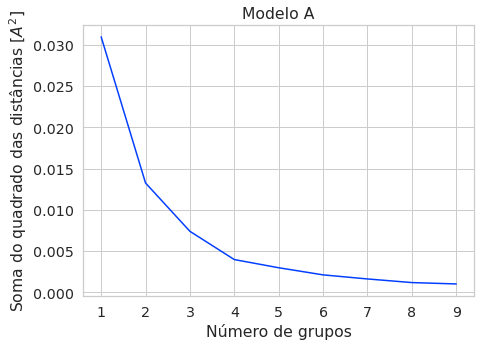

In [ ]:
warnings.simplefilter('ignore')

soma_quadrados = calcular_wcss(elb[['CorrenteRMS']])
plt.figure(figsize=(7,5))
sns.set(palette='bright',color_codes=True,style='whitegrid', font_scale=1.3)

sns.lineplot(range(1,10),soma_quadrados)
# plt.xticks([1, 2,3,4,5,6,7,8,9,10])
plt.xlabel('Número de grupos')
plt.ylabel("Soma do quadrado das distâncias $[A^2]$")
plt.title("Modelo A")
plt.show()

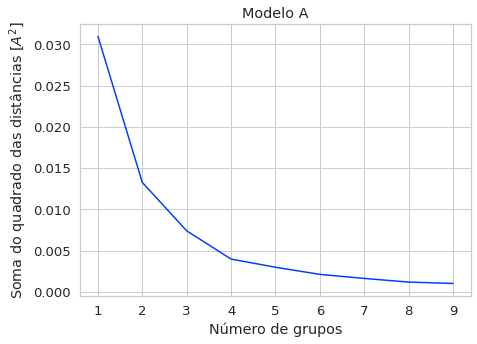

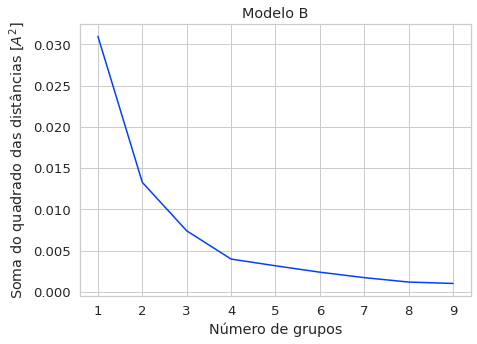

In [ ]:
warnings.simplefilter('ignore')

soma_quadradosB = calcular_wcss(elb[['CorrenteRMS']])
plt.figure(figsize=(7,5))
sns.set(palette='bright',color_codes=True,style='whitegrid', font_scale=1.2)

sns.lineplot(range(1,10),soma_quadrados)
plt.xlabel('Número de grupos')
plt.ylabel("Soma do quadrado das distâncias $[A^2]$")
plt.title("Modelo A")


plt.figure(figsize=(7,5))
sns.set(palette='bright',color_codes=True,style='whitegrid', font_scale=1.2)

sns.lineplot(range(1,10),soma_quadradosB)
plt.xlabel('Número de grupos')
plt.ylabel("Soma do quadrado das distâncias $[A^2]$")
plt.title("Modelo B")
plt.show()

## Gráficos

In [ ]:
def plot_pct_cluster(amostra1,amostra2,amostra3,amostra4,nomeamostra, titulo, pasta):
  
  ''' amostra1, amostra2, amostra3, amostra4: são os ensaios para diferentes médias a ser analisadas
      nomeamostra: nome do ensaio que vai ser gerado o plot ex: a3_1_N
      titulo: titulo do gráfico
      pasta: pasta que vai ser armazenada o gráfico
      '''

  # Configurações para plot dos gráficos
  fig, ax = plt.subplots(1,4,figsize=(20,4))
  sns.set(palette='bright',color_codes=True,style='whitegrid')
  fig.suptitle(f'{titulo}')

  # Retorna o primeiro ensaio passado na função e 
  teste = amostra1[amostra1['Ensaio'] == nomeamostra].copy()
  #  Tranforma o formato da coluna Tempo para integer, de forma que os tempos fiquem discretizados
  teste['Tempo'] = teste['Tempo'].astype(int)
  #  Filtra e retorna para cada tempo o valor total de cada cluster
  teste = teste.groupby('Tempo')['Clusters'].value_counts()
  # Cria uma nova coluna chamada quantidade para armazanar a quantidade de cada cluster
  teste = teste.reset_index(name='Quantidade')
  #faz a soma do total de cluster em cada hora e armazena em uma lista
  teste1 = teste.groupby('Tempo')['Quantidade'].sum()
  # faz a fusão da coluna com o total de cada cluster com a coluna com a soma do total de clusters
  teste = teste.merge(teste1, on='Tempo')
  # cria uma coluna chamada porcentagem que retorna a porcentagem do total de cluster em relação a soma do total de clusters
  teste['porcentagem'] = (teste.Quantidade_x / teste.Quantidade_y)*100

  teste2 = amostra2[amostra2['Ensaio'] == nomeamostra].copy()
  teste2['Tempo'] = teste2['Tempo'].astype(int)
  teste2 = teste2.groupby('Tempo')['Clusters'].value_counts()
  teste2 = teste2.reset_index(name='Quantidade')
  teste3 = teste2.groupby('Tempo')['Quantidade'].sum()
  teste2 = teste2.merge(teste3, on='Tempo')
  teste2['porcentagem'] = (teste2.Quantidade_x / teste2.Quantidade_y)*100

  teste4 = amostra3[amostra3['Ensaio'] == nomeamostra].copy()
  teste4['Tempo'] = teste4['Tempo'].astype(int)
  teste4 = teste4.groupby('Tempo')['Clusters'].value_counts()
  teste4 = teste4.reset_index(name='Quantidade')
  teste5 = teste4.groupby('Tempo')['Quantidade'].sum()
  teste4 = teste4.merge(teste5, on='Tempo')
  teste4['porcentagem'] = (teste4.Quantidade_x / teste4.Quantidade_y)*100

  teste6 = amostra4[amostra4['Ensaio'] == nomeamostra].copy()
  teste6['Tempo'] = teste6['Tempo'].astype(int)
  teste6 = teste6.groupby('Tempo')['Clusters'].value_counts()
  teste6 = teste6.reset_index(name='Quantidade')
  teste7 = teste6.groupby('Tempo')['Quantidade'].sum()
  teste6 = teste6.merge(teste7, on='Tempo')
  teste6['porcentagem'] = (teste6.Quantidade_x / teste6.Quantidade_y)*100

  # função para gerar o gráfico com eixo x: Tempo, eixo y: Porcentagem, filtrando os valores pelo cluster classificado
  sns.barplot(x= teste['Tempo'], y = teste['porcentagem'], hue=teste["Clusters"], ax=ax[0])
  ax[0].set_title(f'Proporção de clusters : M = 1')
  ax[0].set_xlabel('Tempo [h]')
  ax[0].set_ylabel('Porcentagem [%]')

  sns.barplot(x= teste2['Tempo'], y = teste2['porcentagem'], hue=teste2["Clusters"], ax=ax[1])
  ax[1].set_title(f'Proporção de clusters : M = 5')
  ax[1].set_xlabel('Tempo [h]')
  ax[1].set_ylabel('Porcentagem [%]')

  sns.barplot(x= teste4['Tempo'], y = teste4['porcentagem'], hue=teste4["Clusters"], ax=ax[2])
  ax[2].set_title(f'Proporção de clusters : M = 10')
  ax[2].set_xlabel('Tempo [h]')
  ax[2].set_ylabel('Porcentagem [%]')

  sns.barplot(x= teste6['Tempo'], y = teste6['porcentagem'], hue=teste6["Clusters"], ax=ax[3])
  ax[3].set_title(f'Proporção de clusters : M = 30')
  ax[3].set_xlabel('Tempo [h]')
  ax[3].set_ylabel('Porcentagem [%]')

  # plt.savefig(f'/content/drive/My Drive/Nicolas/IMG-Clusters_X_Tempo/{pasta}/{titulo}.pdf')

  plt.show()

# Modelos

In [ ]:
def dif_medias(amostra,coluna,nome,numerofeat,janela,media):
  features = []

  # se o numero de features desejado for 1, passa para a lista features o nome da coluna e media a ser aplicada o kmeans 
  if numerofeat == 1:
    features = [f'{coluna}_MA_{media}']

  # se o numero de features desejado for 3, passa para a lista features o nome da coluna e media e dois valores anteriores de acordo com a janela D
  if numerofeat == 3:

    # Para janela D 1 atribui a features os nomes da coluna com valor atual K, K-1 e K-2
    if janela == 1:
      features = [f'{coluna}_MA_{media}',f'{coluna}_MA_{media}(K-1)',f'{coluna}_MA_{media}(K-2)']

    # Para janela D 10 atribui a features os nomes da coluna com valor atual K, K-10 e K-20
    if janela == 10:
      features = [f'{coluna}_MA_{media}',f'{coluna}_MA_{media}(K-10)',f'{coluna}_MA_{media}(K-20)']

    # Para janela D 10 atribui a features os nomes da coluna com valor atual K, K-30 e K-60
    if janela == 30:
      features = [f'{coluna}_MA_{media}',f'{coluna}_MA_{media}(K-30)',f'{coluna}_MA_{media}(K-60)']

  # se o numero de features desejado for 5, passa para a lista features o nome da coluna e media e quatro valores anteriores de acordo com a janela D
  if numerofeat == 5:

    # Para janela D 1 atribui a features os nomes da coluna com valor atual K, K-1, K-2, K-3, K-4
    if janela == 1:
      features = [f'{coluna}_MA_{media}',f'{coluna}_MA_{media}(K-1)',f'{coluna}_MA_{media}(K-2)',f'{coluna}_MA_{media}(K-3)',f'{coluna}_MA_{media}(K-4)']

    # Para janela D 10 atribui a features os nomes da coluna com valor atual K, K-10, K-20, K-30, K-40
    if janela == 10:
      features = [f'{coluna}_MA_{media}',f'{coluna}_MA_{media}(K-10)',f'{coluna}_MA_{media}(K-20)', f'{coluna}_MA_{media}(K-30)', f'{coluna}_MA_{media}(K-40)']

    # Para janela D 30 atribui a features os nomes da coluna com valor atual K, K-30, K-60, K-90, K-120
    if janela == 30:
      features = [f'{coluna}_MA_{media}',f'{coluna}_MA_{media}(K-30)',f'{coluna}_MA_{media}(K-60)', f'{coluna}_MA_{media}(K-90)', f'{coluna}_MA_{media}(K-120)']

  nome1 = amostra.copy()
  # retorna uma tabela com o nome das colunas que foram atribuidas a lista features
  nomefeat = nome1[features].copy()
  # retira todas a linhas que possuem algum valor NaN, Kmeans não aceita valores NaN
  nomefeat = nomefeat.dropna()

  # treina e atribui as previsões de clusters para um valor prévio de 3 clusters
  modelo5 = KMeans(n_clusters=3, random_state=42)
  modelo5.fit_predict(nomefeat)

  # nova tabela apenas com as linhas que foram usadas no treino do kmeans
  nome1 = nome1.iloc[nomefeat.index]
  # Cria uma nova coluna chamada Clusters para armazenar os valores da clusterização do Kmeans
  nome1['Clusters'] = modelo5.labels_

  return nome1

In [ ]:
# Aplica o kmeans para diferentes features, plota os gráficos e gera as tabelas com os clusters para cada ponto no tempo
def dif_feat(nomeamostra, a_1, a_2, a_3, abrev, coluna, pasta, numerofeat, tempo):
  tabela = pd.DataFrame()
  amostra = aplica_tratamento(a_1,a_2,a_3,abrev, numerofeat, tempo)

  # aplica o kmeans para todas variações de média e janela se o número de features desejado for 1
  if numerofeat == 1:
    a3_m1_1 = dif_medias(amostra,coluna,f'{abrev}_m1_1',1,1,1)
    a3_m5_1 = dif_medias(amostra,coluna,f'{abrev}_m5_1',1,1,5)
    a3_m10_1 = dif_medias(amostra,coluna,f'{abrev}_m10_1',1,1,10)
    a3_m30_1 = dif_medias(amostra,coluna,f'{abrev}_m30_1',1,1,30)

    a3_m1_1020 = dif_medias(amostra,coluna,f'{abrev}_m1_10',1,10,1)
    a3_m5_1020 = dif_medias(amostra,coluna,f'{abrev}_m5_10',1,10,5)
    a3_m10_1020 = dif_medias(amostra,coluna,f'{abrev}_m10_10',1,10,10)
    a3_m30_1020 = dif_medias(amostra,coluna,f'{abrev}_m30_10',1,10,30)

    a3_m1_3060 = dif_medias(amostra,coluna,f'{abrev}_m1_30',1,30,1)
    a3_m5_3060 = dif_medias(amostra,coluna,f'{abrev}_m5_30',1,30,5)
    a3_m10_3060 = dif_medias(amostra,coluna,f'{abrev}_m10_30',1,30,10)
    a3_m30_3060 = dif_medias(amostra,coluna,f'{abrev}_m30_30',1,30,30)

  # aplica o kmeans para todas variações de média e janela se o número de features desejado for 3
  if numerofeat == 3:
    a3_m1_1 = dif_medias(amostra,coluna,f'{abrev}_m1_1',3,1,1)
    a3_m5_1 = dif_medias(amostra,coluna,f'{abrev}_m5_1',3,1,5)
    a3_m10_1 = dif_medias(amostra,coluna,f'{abrev}_m10_1',3,1,10)
    a3_m30_1 = dif_medias(amostra,coluna,f'{abrev}_m30_1',3,1,30)

    a3_m1_1020 = dif_medias(amostra,coluna,f'{abrev}_m1_10',3,10,1)
    a3_m5_1020 = dif_medias(amostra,coluna,f'{abrev}_m5_10',3,10,5)
    a3_m10_1020 = dif_medias(amostra,coluna,f'{abrev}_m10_10',3,10,10)
    a3_m30_1020 = dif_medias(amostra,coluna,f'{abrev}_m30_10',3,10,30)

    a3_m1_3060 = dif_medias(amostra,coluna,f'{abrev}_m1_30',3,30,1)
    a3_m5_3060 = dif_medias(amostra,coluna,f'{abrev}_m5_30',3,30,5)
    a3_m10_3060 = dif_medias(amostra,coluna,f'{abrev}_m10_30',3,30,10)
    a3_m30_3060 = dif_medias(amostra,coluna,f'{abrev}_m30_30',3,30,30)

  # aplica o kmeans para todas variações de média e janela se o número de features desejado for 5
  if numerofeat == 5:
    a3_m1_1 = dif_medias(amostra,coluna,f'{abrev}_m1_1',5,1,1)
    a3_m5_1 = dif_medias(amostra,coluna,f'{abrev}_m5_1',5,1,5)
    a3_m10_1 = dif_medias(amostra,coluna,f'{abrev}_m10_1',5,1,10)
    a3_m30_1 = dif_medias(amostra,coluna,f'{abrev}_m30_1',5,1,30)

    a3_m1_1020 = dif_medias(amostra,coluna,f'{abrev}_m1_10',5,10,1)
    a3_m5_1020 = dif_medias(amostra,coluna,f'{abrev}_m5_10',5,10,5)
    a3_m10_1020 = dif_medias(amostra,coluna,f'{abrev}_m10_10',5,10,10)
    a3_m30_1020 = dif_medias(amostra,coluna,f'{abrev}_m30_10',5,10,30)

    a3_m1_3060 = dif_medias(amostra,coluna,f'{abrev}_m1_30',5,30,1)
    a3_m5_3060 = dif_medias(amostra,coluna,f'{abrev}_m5_30',5,30,5)
    a3_m10_3060 = dif_medias(amostra,coluna,f'{abrev}_m10_30',5,30,10)
    a3_m30_3060 = dif_medias(amostra,coluna,f'{abrev}_m30_30',5,30,30)


  # # Chama a função que gera os gráficos para todas as médias, ensaio não amaciado e janela D = 1
  # plot_pct_cluster(a3_m1_1,a3_m5_1,a3_m10_1,a3_m30_1,f'{abrev}_1_N', f'{nomeamostra} - {coluna} - Não amaciada (N = {numerofeat}, D = 1)', pasta)
  # # Chama a função que gera os gráficos para todas as médias, ensaio não amaciado e janela D = 10
  # plot_pct_cluster(a3_m1_1020,a3_m5_1020,a3_m10_1020,a3_m30_1020,f'{abrev}_1_N', f'{nomeamostra} - {coluna} - Não amaciada (N = {numerofeat}, D = 10)', pasta)
  # # Chama a função que gera os gráficos para todas as médias, ensaio não amaciado e janela D = 30
  # plot_pct_cluster(a3_m1_3060,a3_m5_3060,a3_m10_3060,a3_m30_3060,f'{abrev}_1_N', f'{nomeamostra} - {coluna} - Não amaciada (N = {numerofeat}, D = 30)', pasta)

  # # Chama a função que gera os gráficos para todas as médias, primeiro ensaio amaciado e janela D = 1
  # plot_pct_cluster(a3_m1_1,a3_m5_1,a3_m10_1,a3_m30_1,f'{abrev}_2_A', f'{nomeamostra} - {coluna} - Amaciada 1 (N = {numerofeat}, D = 1)', pasta)
  # # Chama a função que gera os gráficos para todas as médias, primeiro ensaio amaciado e janela D = 10
  # plot_pct_cluster(a3_m1_1020,a3_m5_1020,a3_m10_1020,a3_m30_1020,f'{abrev}_2_A', f'{nomeamostra} - {coluna} - Amaciada 1 (N = {numerofeat}, D = 10)', pasta)
  # # Chama a função que gera os gráficos para todas as médias, primeiro ensaio amaciado e janela D = 30
  # plot_pct_cluster(a3_m1_3060,a3_m5_3060,a3_m10_3060,a3_m30_3060,f'{abrev}_2_A', f'{nomeamostra} - {coluna} - Amaciada 1 (N = {numerofeat}, D = 30)', pasta)

  # # Chama a função que gera os gráficos para todas as médias, segundo ensaio amaciado e janela D = 1
  # plot_pct_cluster(a3_m1_1,a3_m5_1,a3_m10_1,a3_m30_1,f'{abrev}_3_A', f'{nomeamostra} - {coluna} - Amaciada 2 (N = {numerofeat}, D = 1)', pasta)
  # # Chama a função que gera os gráficos para todas as médias, segundo ensaio amaciado e janela D = 10
  # plot_pct_cluster(a3_m1_1020,a3_m5_1020,a3_m10_1020,a3_m30_1020,f'{abrev}_3_A', f'{nomeamostra} - {coluna} - Amaciada 2 (N = {numerofeat}, D = 10)', pasta)
  # # Chama a função que gera os gráficos para todas as médias, segundo ensaio amaciado e janela D = 30
  # plot_pct_cluster(a3_m1_3060,a3_m5_3060,a3_m10_3060,a3_m30_3060,f'{abrev}_3_A', f'{nomeamostra} - {coluna} - Amaciada 2 (N = {numerofeat}, D = 30)', pasta)


  # Variáveis criadas para armazenar o resultado da clusterização para cada variação de média e janela
  nomecluster8 = coluna + 'M1_01'
  a3_m1_1 = a3_m1_1.rename(columns={"Clusters": nomecluster8})

  nomecluster9 = coluna + 'M5_01'
  a3_m5_1 = a3_m5_1.rename(columns={"Clusters": nomecluster9})

  nomecluster10 = coluna + 'M10_01'
  a3_m10_1 = a3_m10_1.rename(columns={"Clusters": nomecluster10})

  nomecluster11 = coluna + 'M30_01'
  a3_m30_1 = a3_m30_1.rename(columns={"Clusters": nomecluster11})

  nomecluster0 = coluna + 'M1_10'
  a3_m1_1020 = a3_m1_1020.rename(columns={"Clusters": nomecluster0})

  nomecluster1 = coluna + 'M5_10'
  a3_m5_1020 = a3_m5_1020.rename(columns={"Clusters": nomecluster1})
    
  nomecluster2 = coluna + 'M10_10'
  a3_m10_1020 = a3_m10_1020.rename(columns={"Clusters": nomecluster2})

  nomecluster3 = coluna + 'M30_10'
  a3_m30_1020 = a3_m30_1020.rename(columns={"Clusters": nomecluster3})

  nomecluster4 = coluna + 'M1_30'
  a3_m1_3060 = a3_m1_3060.rename(columns={"Clusters": nomecluster4})

  nomecluster5 = coluna + 'M5_30'
  a3_m5_3060 = a3_m5_3060.rename(columns={"Clusters": nomecluster5})

  nomecluster6 = coluna + 'M10_30'
  a3_m10_3060 = a3_m10_3060.rename(columns={"Clusters": nomecluster6})

  nomecluster7 = coluna + 'M30_30'
  a3_m30_3060 = a3_m30_3060.rename(columns={"Clusters": nomecluster7})

  # concatenando todas as colunas com clusters armazenados
  tabela = pd.concat([a3_m1_1[['Tempo',nomecluster8]],a3_m5_1[[nomecluster9]], a3_m10_1[[nomecluster10]] , a3_m30_1[[nomecluster11]],
                      a3_m1_1020[[nomecluster0]],a3_m5_1020[[nomecluster1]], a3_m10_1020[[nomecluster2]] , a3_m30_1020[[nomecluster3]],
                      a3_m1_3060[[nomecluster4]], a3_m5_3060[[nomecluster5]] , a3_m10_3060[[nomecluster6]] , a3_m30_3060[[nomecluster7]]], axis=1)

  return tabela

In [ ]:
# retorna uma tabela final com os clusters para o ensaio não amaciado e os dois ensaios amaciados
def cria_tabelas(nomeamostra, a_1, a_2, a_3, abrev, process_colunas, pasta, numerofeat, tempo):
  tabelao = pd.DataFrame()
  for i in process_colunas:
    t = dif_feat(nomeamostra, a_1,a_2,a_3, abrev, i, pasta, numerofeat, tempo)
    tabelao = pd.concat([tabelao,t], axis=1)
  tabelao = tabelao.loc[:,~tabelao.columns.duplicated()].copy()
  return tabelao

In [ ]:
# Colunas usadas para análise
processadas = ['CorrenteRMS', 'CorrenteVariancia', 'CorrenteCurtose', 'VibracaoCalotaInferiorRMS', 'VibracaoCalotaSuperiorRMS',
               'VibracaoCalotaInferiorCurtose','VibracaoCalotaSuperiorCurtose', 
               'VibracaoCalotaInferiorVariancia', 'VibracaoCalotaSuperiorVariancia', 'Vazao']

In [ ]:
# # Amostra A3 , 1 feature
# t_a3_N1_s = cria_tabelas('amostra3', a3_1,a3_2,a3_3, 'a3', processadas,'Porcentagem_v3/Amostra3', 1, 19)
# # Amostra A3, 3 features
# t_a3_N3_s = cria_tabelas('amostra3', a3_1,a3_2,a3_3, 'a3', processadas,'Porcentagem_v3/Amostra3', 3, 19)
# # Amostra A3, 5 feature
# t_a3_N5_s = cria_tabelas('amostra3', a3_1,a3_2,a3_3, 'a3', processadas,'Porcentagem_v3/Amostra3', 5, 19)

# # Amostra A4, 1 feature
# t_a4_N1_s = cria_tabelas('amostra4', a4_1,a4_2,a4_3, 'a4', processadas,'Porcentagem_v3/Amostra4', 1, 19)
# # Amostra A4, 3 features
# t_a4_N3_s = cria_tabelas('amostra4', a4_1,a4_2,a4_3, 'a4', processadas,'Porcentagem_v3/Amostra4', 3, 19)
# # Amostra A4, 5 features
# t_a4_N5_s = cria_tabelas('amostra4', a4_1,a4_2,a4_3, 'a4', processadas,'Porcentagem_v3/Amostra4', 5, 19)

# # Amostra A5, 1 feature
# t_a5_N1_s = cria_tabelas('amostra5', a5_1,a5_2,a5_3, 'a5', processadas,'Porcentagem_v3/Amostra5', 1, 19)
# # Amostra A5, 3 features
# t_a5_N3_s = cria_tabelas('amostra5', a5_1,a5_2,a5_3, 'a5', processadas,'Porcentagem_v3/Amostra5', 3, 19)
# # Amostra A5, 5 features
# t_a5_N5_s = cria_tabelas('amostra5', a5_1,a5_2,a5_3, 'a5', processadas,'Porcentagem_v3/Amostra5', 5, 19)



In [ ]:
# # exportando as tabelas em csv para o drive
# pastadriveA = '/content/drive/My Drive/Nicolas/IMG-Clusters_X_Tempo/Artigo_kmeans/non_scaled/'
# t_a3_N1_s.to_csv(f'{pastadriveA}a3_N1_s.csv')
# t_a3_N3_s.to_csv(f'{pastadriveA}a3_N3_s.csv')
# t_a3_N5_s.to_csv(f'{pastadriveA}a3_N5_s.csv')

# t_a4_N1_s.to_csv(f'{pastadriveA}a4_N1_s.csv')
# t_a4_N3_s.to_csv(f'{pastadriveA}a4_N3_s.csv')
# t_a4_N5_s.to_csv(f'{pastadriveA}a4_N5_s.csv')

# t_a5_N1_s.to_csv(f'{pastadriveA}a5_N1_s.csv')
# t_a5_N3_s.to_csv(f'{pastadriveA}a5_N3_s.csv')
# t_a5_N5_s.to_csv(f'{pastadriveA}a5_N5_s.csv')

In [ ]:
# t_a2_N1_ns = cria_tabelas('amostra2', a2_1,a2_2,a2_3, 'a2', processadas,'Porcentagem_v3/Amostra2', 1, 20)
# t_a2_N3_ns = cria_tabelas('amostra2', a2_1,a2_2,a2_3, 'a2', processadas,'Porcentagem_v3/Amostra2', 3, 20)
# t_a2_N5_ns = cria_tabelas('amostra2', a2_1,a2_2,a2_3, 'a2', processadas,'Porcentagem_v3/Amostra2', 5, 20)

# t_a3_N1_ns = cria_tabelas('amostra3', a3_1,a3_2,a3_3, 'a3', processadas,'Porcentagem_v3/Amostra3', 1, 20)
# t_a3_N3_ns = cria_tabelas('amostra3', a3_1,a3_2,a3_3, 'a3', processadas,'Porcentagem_v3/Amostra3', 3, 20)
# t_a3_N5_ns = cria_tabelas('amostra3', a3_1,a3_2,a3_3, 'a3', processadas,'Porcentagem_v3/Amostra3', 5, 20)

# t_a4_N1_ns = cria_tabelas('amostra4', a4_1,a4_2,a4_3, 'a4', processadas,'Porcentagem_v3/Amostra4', 1, 20)
# t_a4_N3_ns = cria_tabelas('amostra4', a4_1,a4_2,a4_3, 'a4', processadas,'Porcentagem_v3/Amostra4', 3, 20)
# t_a4_N5_ns = cria_tabelas('amostra4', a4_1,a4_2,a4_3, 'a4', processadas,'Porcentagem_v3/Amostra4', 5, 20)

# t_a5_N1_ns = cria_tabelas('amostra5', a5_1,a5_2,a5_3, 'a5', processadas,'Porcentagem_v3/Amostra5', 1, 20)
# t_a5_N3_ns = cria_tabelas('amostra5', a5_1,a5_2,a5_3, 'a5', processadas,'Porcentagem_v3/Amostra5', 3, 20)
# t_a5_N5_ns = cria_tabelas('amostra5', a5_1,a5_2,a5_3, 'a5', processadas,'Porcentagem_v3/Amostra5', 5, 20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# pastadriveA = '/content/drive/My Drive/Nicolas/2021-08 - Cluster dados/compressor A/non_scaled/'
# t_a2_N1_ns.to_csv(f'{pastadriveA}a2_N1_ns.csv')
# t_a2_N3_ns.to_csv(f'{pastadriveA}a2_N3_ns.csv')
# t_a2_N5_ns.to_csv(f'{pastadriveA}a2_N5_ns.csv')

# t_a3_N1_ns.to_csv(f'{pastadriveA}a3_N1_ns.csv')
# t_a3_N3_ns.to_csv(f'{pastadriveA}a3_N3_ns.csv')
# t_a3_N5_ns.to_csv(f'{pastadriveA}a3_N5_ns.csv')

# t_a4_N1_ns.to_csv(f'{pastadriveA}a4_N1_ns.csv')
# t_a4_N3_ns.to_csv(f'{pastadriveA}a4_N3_ns.csv')
# t_a4_N5_ns.to_csv(f'{pastadriveA}a4_N5_ns.csv')

# t_a5_N1_ns.to_csv(f'{pastadriveA}a5_N1_ns.csv')
# t_a5_N3_ns.to_csv(f'{pastadriveA}a5_N3_ns.csv')
# t_a5_N5_ns.to_csv(f'{pastadriveA}a5_N5_ns.csv')

In [ ]:
# # Amostra B5 , 1 feature
# t_b5_N1_s = cria_tabelas('amostraB5', b5_1,b5_2,b5_3, 'b5', processadas,'Porcentagem_v3/AmostraB5', 1, 40)
# # Amostra B5 , 3 features
# t_b5_N3_s = cria_tabelas('amostraB5', b5_1,b5_2,b5_3, 'b5', processadas,'Porcentagem_v3/AmostraB5', 3, 40)
# # Amostra B5 , 5 features
# t_b5_N5_s = cria_tabelas('amostraB5', b5_1,b5_2,b5_3, 'b5', processadas,'Porcentagem_v3/AmostraB5', 5, 40)

# # Amostra B10 , 1 feature
# t_b10_N1_s = cria_tabelas('amostraB10', b10_1,b10_2,b10_3, 'b10', processadas,'Porcentagem_v3/AmostraB10', 1, 40)
# # Amostra B10 , 3 features
# t_b10_N3_s = cria_tabelas('amostraB10', b10_1,b10_2,b10_3, 'b10', processadas,'Porcentagem_v3/AmostraB10', 3, 40)
# # Amostra B10 , 5 features
# t_b10_N5_s = cria_tabelas('amostraB10', b10_1,b10_2,b10_3, 'b10', processadas,'Porcentagem_v3/AmostraB10', 5, 40)

# # Amostra B11 , 1 feature
# t_b11_N1_s = cria_tabelas('amostraB11', b11_1,b11_2,b11_3, 'b11', processadas,'Porcentagem_v3/AmostraB11', 1, 40)
# # Amostra B11 , 3 features
# t_b11_N3_s = cria_tabelas('amostraB11', b11_1,b11_2,b11_3, 'b11', processadas,'Porcentagem_v3/AmostraB11', 3, 40)
# # Amostra B11 , 5 features
# t_b11_N5_s = cria_tabelas('amostraB11', b11_1,b11_2,b11_3, 'b11', processadas,'Porcentagem_v3/AmostraB11', 5, 40)

In [ ]:
# # exportando as tabelas em csv para o drive
# pastadriveB = '/content/drive/My Drive/Nicolas/IMG-Clusters_X_Tempo/Artigo_kmeans/compressor B/scaled/'

# t_b5_N1_s.to_csv(f'{pastadriveB}b5_N1_s.csv')
# t_b5_N3_s.to_csv(f'{pastadriveB}b5_N3_s.csv')
# t_b5_N5_s.to_csv(f'{pastadriveB}b5_N5_s.csv')

# t_b10_N1_s.to_csv(f'{pastadriveB}b10_N1_s.csv')
# t_b10_N3_s.to_csv(f'{pastadriveB}b10_N3_s.csv')
# t_b10_N5_s.to_csv(f'{pastadriveB}b10_N5_s.csv')

# t_b11_N1_s.to_csv(f'{pastadriveB}b11_N1_s.csv')
# t_b11_N3_s.to_csv(f'{pastadriveB}b11_N3_s.csv')
# t_b11_N5_s.to_csv(f'{pastadriveB}b11_N5_s.csv')

In [ ]:
# t_b5_N1_ns = cria_tabelas('amostraB5', b5_1,b5_2,b5_3, 'b5', processadas,'Porcentagem_v3/AmostraB5', 1, 40)
# t_b5_N3_ns = cria_tabelas('amostraB5', b5_1,b5_2,b5_3, 'b5', processadas,'Porcentagem_v3/AmostraB5', 3, 40)
# t_b5_N5_ns = cria_tabelas('amostraB5', b5_1,b5_2,b5_3, 'b5', processadas,'Porcentagem_v3/AmostraB5', 5, 40)

# t_b7_N1_ns = cria_tabelas('amostraB7', b7_1,b7_2,b7_3, 'b7', processadas,'Porcentagem_v3/AmostraB7', 1, 40)
# t_b7_N3_ns = cria_tabelas('amostraB7', b7_1,b7_2,b7_3, 'b7', processadas,'Porcentagem_v3/AmostraB7', 3, 40)
# t_b7_N5_ns = cria_tabelas('amostraB7', b7_1,b7_2,b7_3, 'b7', processadas,'Porcentagem_v3/AmostraB7', 5, 40)

# t_b8_N1_ns = cria_tabelas('amostraB8', b8_1,b8_2,b8_3, 'b8', processadas,'Porcentagem_v3/AmostraB8', 1, 40)
# t_b8_N3_ns = cria_tabelas('amostraB8', b8_1,b8_2,b8_3, 'b8', processadas,'Porcentagem_v3/AmostraB8', 3, 40)
# t_b8_N5_ns = cria_tabelas('amostraB8', b8_1,b8_2,b8_3, 'b8', processadas,'Porcentagem_v3/AmostraB8', 5, 40)

# t_b10_N1_ns = cria_tabelas('amostraB10', b10_1,b10_2,b10_3, 'b10', processadas,'Porcentagem_v3/AmostraB10', 1, 40)
# t_b10_N3_ns = cria_tabelas('amostraB10', b10_1,b10_2,b10_3, 'b10', processadas,'Porcentagem_v3/AmostraB10', 3, 40)
# t_b10_N5_ns = cria_tabelas('amostraB10', b10_1,b10_2,b10_3, 'b10', processadas,'Porcentagem_v3/AmostraB10', 5, 40)

# t_b11_N1_ns = cria_tabelas('amostraB11', b11_1,b11_2,b11_3, 'b11', processadas,'Porcentagem_v3/AmostraB11', 1, 40)
# t_b11_N3_ns = cria_tabelas('amostraB11', b11_1,b11_2,b11_3, 'b11', processadas,'Porcentagem_v3/AmostraB11', 3, 40)
# t_b11_N5_ns = cria_tabelas('amostraB11', b11_1,b11_2,b11_3, 'b11', processadas,'Porcentagem_v3/AmostraB11', 5, 40)

# t_b12_N1_ns = cria_tabelas('amostraB12', b12_1,b12_2,b12_3, 'b12', processadas,'Porcentagem_v3/AmostraB12', 1, 40)
# t_b12_N3_ns = cria_tabelas('amostraB12', b12_1,b12_2,b12_3, 'b12', processadas,'Porcentagem_v3/AmostraB12', 3, 40)
# t_b12_N5_ns = cria_tabelas('amostraB12', b12_1,b12_2,b12_3, 'b12', processadas,'Porcentagem_v3/AmostraB12', 5, 40)

# t_b15_N1_ns = cria_tabelas('amostraB15', b15_1,b15_2,b15_3, 'b15', processadas,'Porcentagem_v3/AmostraB15', 1, 40)
# t_b15_N3_ns = cria_tabelas('amostraB15', b15_1,b15_2,b15_3, 'b15', processadas,'Porcentagem_v3/AmostraB15', 3, 40)
# t_b15_N5_ns = cria_tabelas('amostraB15', b15_1,b15_2,b15_3, 'b15', processadas,'Porcentagem_v3/AmostraB15', 5, 40)


In [ ]:
# pastadriveB = '/content/drive/My Drive/Nicolas/2021-08 - Cluster dados/compressor B/non_scaled/'


# t_b5_N1_ns.to_csv(f'{pastadriveB}b5_N1_ns.csv')
# t_b5_N3_ns.to_csv(f'{pastadriveB}b5_N3_ns.csv')
# t_b5_N5_ns.to_csv(f'{pastadriveB}b5_N5_ns.csv')

# t_b7_N1_ns.to_csv(f'{pastadriveB}b7_N1_ns.csv')
# t_b7_N3_ns.to_csv(f'{pastadriveB}b7_N3_ns.csv')
# t_b7_N5_ns.to_csv(f'{pastadriveB}b7_N5_ns.csv')

# t_b8_N1_ns.to_csv(f'{pastadriveB}b8_N1_ns.csv')
# t_b8_N3_ns.to_csv(f'{pastadriveB}b8_N3_ns.csv')
# t_b8_N5_ns.to_csv(f'{pastadriveB}b8_N5_ns.csv')

# t_b10_N1_ns.to_csv(f'{pastadriveB}b10_N1_ns.csv')
# t_b10_N3_ns.to_csv(f'{pastadriveB}b10_N3_ns.csv')
# t_b10_N5_ns.to_csv(f'{pastadriveB}b10_N5_ns.csv')

# t_b11_N1_ns.to_csv(f'{pastadriveB}b11_N1_ns.csv')
# t_b11_N3_ns.to_csv(f'{pastadriveB}b11_N3_ns.csv')
# t_b11_N5_ns.to_csv(f'{pastadriveB}b11_N5_ns.csv')

# t_b12_N1_ns.to_csv(f'{pastadriveB}b12_N1_ns.csv')
# t_b12_N3_ns.to_csv(f'{pastadriveB}b12_N3_ns.csv')
# t_b12_N5_ns.to_csv(f'{pastadriveB}b12_N5_ns.csv')

# t_b15_N1_ns.to_csv(f'{pastadriveB}b15_N1_ns.csv')
# t_b15_N3_ns.to_csv(f'{pastadriveB}b15_N3_ns.csv')
# t_b15_N5_ns.to_csv(f'{pastadriveB}b15_N5_ns.csv')

In [ ]:
# t_b11_N1_ns
tabelab = pd.read_csv('/content/drive/My Drive/Nicolas/2021-08 - Cluster dados/compressor A/non_scaled/a3_N5_ns.csv')
tabelab

,Unnamed: 0,Tempo,CorrenteRMSM1_01,CorrenteRMSM5_01,CorrenteRMSM10_01,CorrenteRMSM30_01,CorrenteRMSM1_10,CorrenteRMSM5_10,CorrenteRMSM10_10,CorrenteRMSM30_10,CorrenteRMSM1_30,CorrenteRMSM5_30,CorrenteRMSM10_30,CorrenteRMSM30_30,CorrenteVarianciaM1_01,CorrenteVarianciaM5_01,CorrenteVarianciaM10_01,CorrenteVarianciaM30_01,CorrenteVarianciaM1_10,CorrenteVarianciaM5_10,CorrenteVarianciaM10_10,CorrenteVarianciaM30_10,CorrenteVarianciaM1_30,CorrenteVarianciaM5_30,CorrenteVarianciaM10_30,CorrenteVarianciaM30_30,CorrenteCurtoseM1_01,CorrenteCurtoseM5_01,CorrenteCurtoseM10_01,CorrenteCurtoseM30_01,CorrenteCurtoseM1_10,CorrenteCurtoseM5_10,CorrenteCurtoseM10_10,CorrenteCurtoseM30_10,CorrenteCurtoseM1_30,CorrenteCurtoseM5_30,CorrenteCurtoseM10_30,CorrenteCurtoseM30_30,VibracaoCalotaInferiorRMSM1_01,VibracaoCalotaInferiorRMSM5_01,...,VibracaoCalotaSuperiorCurtoseM1_30,VibracaoCalotaSuperiorCurtoseM5_30,VibracaoCalotaSuperiorCurtoseM10_30,VibracaoCalotaSuperiorCurtoseM30_30,VibracaoCalotaInferiorVarianciaM1_01,VibracaoCalotaInferiorVarianciaM5_01,VibracaoCalotaInferiorVarianciaM10_01,VibracaoCalotaInferiorVarianciaM30_01,VibracaoCalotaInferiorVarianciaM1_10,VibracaoCalotaInferiorVarianciaM5_10,VibracaoCalotaInferiorVarianciaM10_10,VibracaoCalotaInferiorVarianciaM30_10,VibracaoCalotaInferiorVarianciaM1_30,VibracaoCalotaInferiorVarianciaM5_30,VibracaoCalotaInferiorVarianciaM10_30,VibracaoCalotaInferiorVarianciaM30_30,VibracaoCalotaSuperiorVarianciaM1_01,VibracaoCalotaSuperiorVarianciaM5_01,VibracaoCalotaSuperiorVarianciaM10_01,VibracaoCalotaSuperiorVarianciaM30_01,VibracaoCalotaSuperiorVarianciaM1_10,VibracaoCalotaSuperiorVarianciaM5_10,VibracaoCalotaSuperiorVarianciaM10_10,VibracaoCalotaSuperiorVarianciaM30_10,VibracaoCalotaSuperiorVarianciaM1_30,VibracaoCalotaSuperiorVarianciaM5_30,VibracaoCalotaSuperiorVarianciaM10_30,VibracaoCalotaSuperiorVarianciaM30_30,VazaoM1_01,VazaoM5_01,VazaoM10_01,VazaoM30_01,VazaoM1_10,VazaoM5_10,VazaoM10_10,VazaoM30_10,VazaoM1_30,VazaoM5_30,VazaoM10_30,VazaoM30_30
0,4,1.066672,1,2,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,...,NaN,NaN,NaN,NaN,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,1.083338,1,2,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,...,NaN,NaN,NaN,NaN,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6,1.100005,1,2,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,...,NaN,NaN,NaN,NaN,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7,1.116672,1,2,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,...,NaN,NaN,NaN,NaN,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,1.133339,1,2,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,...,NaN,NaN,NaN,NaN,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3403,3415,19.916747,2,0,2,0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,1,0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2,0,...,0.0,1.0,1.0,1.0,2,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,0,0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1,0,0,1,1.0,1.0,0.0,1.0,0.0,2

In [ ]:
import matplotlib as mpl

In [ ]:
def pontos_cluster(amostra):
  ensaios_amostra = list(amostra['Ensaio'].unique())
  k = 0
  fig, ax = plt.subplots(len(ensaios_amostra),3, figsize=(len(ensaios_amostra)*7,len(ensaios_amostra)*5))
  sns.set(palette='bright',color_codes=True,style='whitegrid')

  for i in ensaios_amostra:

    sns.scatterplot(x='Tempo',y='CorrenteRMS',hue='Clusters',data=amostra[(amostra['Ensaio']==i) & (amostra['Clusters']==0)], ax=ax[k,0])
    ax[k,0].set_title(i)
    ax[k,0].set_ylabel('CorrenteRMS [A]')
    ax[k,0].set_xlabel('Tempo [h]')


    sns.scatterplot(x='Tempo',y='CorrenteRMS',hue='Clusters',data=amostra[(amostra['Ensaio']==i) & (amostra['Clusters']==1)], ax=ax[k,1])
    ax[k,1].set_title(i)
    ax[k,1].set_ylabel('CorrenteRMS [A]')
    ax[k,1].set_xlabel('Tempo [h]')

    sns.scatterplot(x='Tempo',y='CorrenteRMS',hue='Clusters',data=amostra[(amostra['Ensaio']==i) & (amostra['Clusters']==2)], ax=ax[k,2])
    ax[k,2].set_title(i)
    ax[k,2].set_ylabel('CorrenteRMS [A]')
    ax[k,2].set_xlabel('Tempo [h]')

    # plt.savefig(f'Gráfico de dispersão por cluster {i}')

    k=k+1


  fig.tight_layout()

  plt.show()


In [ ]:
def plot_amostra(amostra, coluna, colunalegenda):
  ensaios_amostra = list(amostra['Ensaio'].unique())
  ensaiosl = ["Não amaciado","Amaciado 1", "Amaciado 2"]
  k = 0
  fig, ax = plt.subplots(1,3, figsize=(14,5))
  sns.set(palette='bright',color_codes=True,style='whitegrid', font_scale=1.2)

  palettes ={0: "C0",  1: "C1", 2: "C2"}
  hue_order = [0,1,2]
  legenda = {0: "Grupo 0",  1: "Grupo 1", 2: "Grupo 2"}

  leg = ["Grupo 0", "Grupo 1", "Grupo 2"]

  for i in ensaios_amostra:

    sns.scatterplot(x='Tempo',y=coluna,hue='Clusters',hue_order=hue_order,data=amostra[amostra['Ensaio']==i], ax=ax[k], palette=palettes)
    ax[k].set_title(ensaiosl[k])
    ax[k].set_xlabel('Tempo [h]')

    if k == 0:
      ax[k].set_ylabel(f'{colunalegenda}')
      # ax[k].set_yticklabels(['{:,}'.format(int(x)) for x in ax[k].get_yticks().tolist()])
    else:
      ax[k].set_yticklabels([])
      ax[k].set_ylabel("")

    # ax[k].legend(leg)

    # sns.lineplot(x='Tempo',y='CorrenteRMS',hue='Clusters', data=amostra[amostra['Ensaio']==i], ax=ax[k,1])
    # ax[k,1].set_title(i)
    # ax[k,1].set_ylabel('CorrenteRMS [A]')
    # ax[k,1].set_xlabel('Tempo [h]')

    # plt.savefig(f' Gráfico de linha e dispersão da amostra {i}')

    k=k+1

  # fig.tight_layout()
  plt.tight_layout()
  plt.show()

In [ ]:
rel = aplica_tratamento(a3_1,a3_2,a3_3,"a3", 5, 20)
rot = dif_medias(rel,"CorrenteRMS",'a3_m1_1',5,1,1)
rel4 = aplica_tratamento(a4_1,a4_2,a4_3,"a4", 5,20)
rot4 = dif_medias(rel4,"CorrenteRMS",'a4_m1_1',5,1,1)

In [ ]:
def rel_pct_cluster(amostra,ensaio1,ensaio2,ensaio3):
  
  ''' amostra1, amostra2, amostra3, amostra4: são os ensaios para diferentes médias a ser analisadas
      nomeamostra: nome do ensaio que vai ser gerado o plot ex: a3_1_N
      titulo: titulo do gráfico
      pasta: pasta que vai ser armazenada o gráfico
      '''

  # Configurações para plot dos gráficos
  fig, ax = plt.subplots(1,3,figsize=(14,5))
  sns.set(palette='bright',color_codes=True,style='whitegrid', font_scale=1.2)
  palettes ={0: "C0",  1: "C1", 2: "C2"}
  hue_order = [0,1,2]
  plt.xticks(rotation=70)


  # Retorna o primeiro ensaio passado na função e 
  teste = amostra[amostra['Ensaio'] == ensaio1].copy()
  #  Tranforma o formato da coluna Tempo para integer, de forma que os tempos fiquem discretizados
  teste['Tempo'] = teste['Tempo'].astype(int)
  #  Filtra e retorna para cada tempo o valor total de cada cluster
  teste = teste.groupby('Tempo')['Clusters'].value_counts()
  # Cria uma nova coluna chamada quantidade para armazanar a quantidade de cada cluster
  teste = teste.reset_index(name='Quantidade')
  #faz a soma do total de cluster em cada hora e armazena em uma lista
  teste1 = teste.groupby('Tempo')['Quantidade'].sum()
  # faz a fusão da coluna com o total de cada cluster com a coluna com a soma do total de clusters
  teste = teste.merge(teste1, on='Tempo')
  # cria uma coluna chamada porcentagem que retorna a porcentagem do total de cluster em relação a soma do total de clusters
  teste['porcentagem'] = (teste.Quantidade_x / teste.Quantidade_y)*100

  teste2 = amostra[amostra['Ensaio'] == ensaio2].copy()
  teste2['Tempo'] = teste2['Tempo'].astype(int)
  teste2 = teste2.groupby('Tempo')['Clusters'].value_counts()
  teste2 = teste2.reset_index(name='Quantidade')
  teste3 = teste2.groupby('Tempo')['Quantidade'].sum()
  teste2 = teste2.merge(teste3, on='Tempo')
  teste2['porcentagem'] = (teste2.Quantidade_x / teste2.Quantidade_y)*100

  teste4 = amostra[amostra['Ensaio'] == ensaio3].copy()
  teste4['Tempo'] = teste4['Tempo'].astype(int)
  teste4 = teste4.groupby('Tempo')['Clusters'].value_counts()
  teste4 = teste4.reset_index(name='Quantidade')
  teste5 = teste4.groupby('Tempo')['Quantidade'].sum()
  teste4 = teste4.merge(teste5, on='Tempo')
  teste4['porcentagem'] = (teste4.Quantidade_x / teste4.Quantidade_y)*100

  # função para gerar o gráfico com eixo x: Tempo, eixo y: Porcentagem, filtrando os valores pelo cluster classificado
  sns.barplot(x= teste['Tempo'], y = teste['porcentagem'], hue=teste["Clusters"],hue_order=hue_order, ax=ax[0], palette=palettes)
  ax[0].set_title('Não amaciado')
  ax[0].set_xlabel('Tempo [h]')
  ax[0].set_ylabel('Porcentagem [%]')
  ax[0].tick_params(axis='x', rotation=50)


  sns.barplot(x= teste2['Tempo'], y = teste2['porcentagem'], hue=teste2["Clusters"],hue_order=hue_order, ax=ax[1], palette=palettes)
  ax[1].set_title('Amaciado 1')
  ax[1].set_xlabel('Tempo [h]')
  ax[1].set_ylabel('')
  ax[1].set_yticklabels([])
  ax[1].tick_params(axis='x', rotation=50)


  sns.barplot(x= teste4['Tempo'], y = teste4['porcentagem'], hue=teste4["Clusters"], hue_order=hue_order,ax=ax[2], palette=palettes)
  ax[2].set_title('Amaciado 2')
  ax[2].set_xlabel('Tempo [h]')
  ax[2].set_ylabel('')
  ax[2].set_yticklabels([])
  ax[2].tick_params(axis='x', rotation=50)


  plt.tight_layout()
  plt.show()

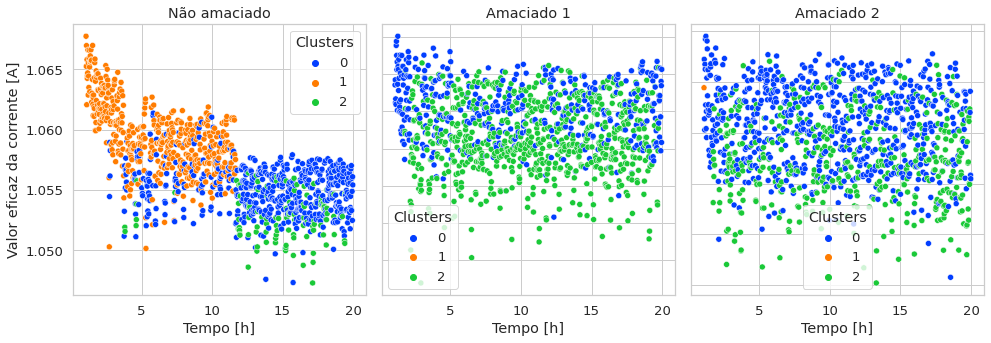

In [ ]:
plot_amostra(rot, "CorrenteRMS", "Valor eficaz da corrente [A]")

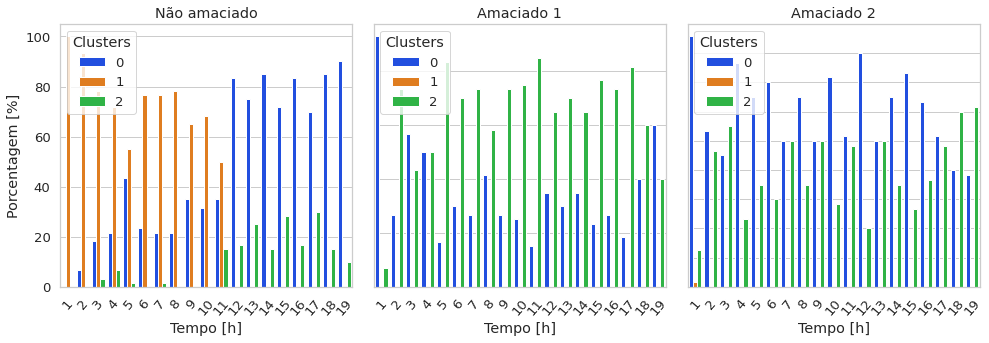

In [ ]:
rel_pct_cluster(rot,"a3_1_N", "a3_2_A","a3_3_A")

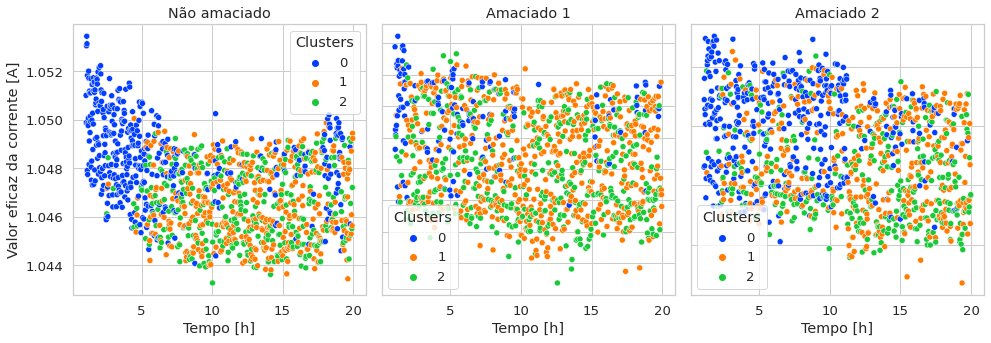

In [ ]:

plot_amostra(rot4, "CorrenteRMS", "Valor eficaz da corrente [A]")

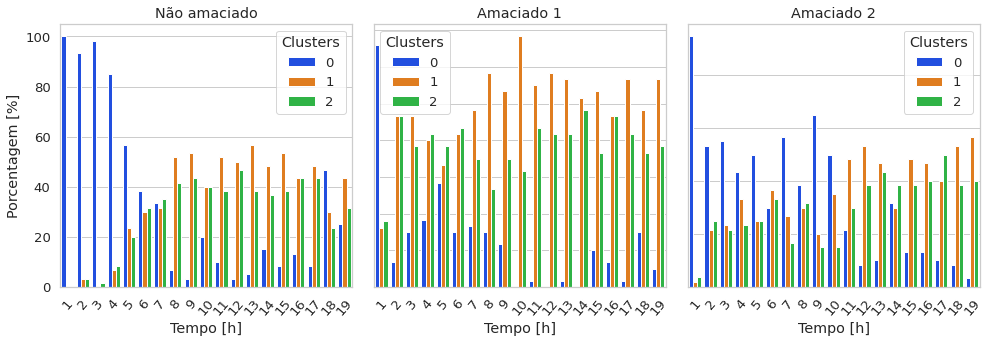

In [ ]:
rel_pct_cluster(rot4,"a4_1_N", "a4_2_A","a4_3_A")

In [ ]:
# Colunas usadas para análise
processadas = ['CorrenteRMS', 'CorrenteVariancia', 'CorrenteCurtose', 'VibracaoCalotaInferiorRMS', 'VibracaoCalotaSuperiorRMS',
               'VibracaoCalotaInferiorCurtose','VibracaoCalotaSuperiorCurtose', 
               'VibracaoCalotaInferiorVariancia', 'VibracaoCalotaSuperiorVariancia', 'Vazao']

Comparativo entre grandezas


In [ ]:
corr4 = aplica_tratamento(a4_1,a4_2,a4_3,"a4", 5, 20)
corrfim4 = dif_medias(corr4,"CorrenteRMS",'a4_m1_1',5,1,1)


vibinf4 = aplica_tratamento(a4_1,a4_2,a4_3,"a4", 5, 20)
vibinffim4 = dif_medias(vibinf4,"VibracaoCalotaInferiorRMS",'a4_m1_1',5,1,1)


vibsup4 = aplica_tratamento(a4_1,a4_2,a4_3,"a4", 5, 20)
vibsupfim4 = dif_medias(vibsup4,"VibracaoCalotaSuperiorRMS",'a4_m1_1',5,1,1)

vaz4 = aplica_tratamento(a4_1,a4_2,a4_3,"a4", 5, 20)
vazfim4 = dif_medias(vaz4,"Vazao",'a4_m1_1',5,1,1)

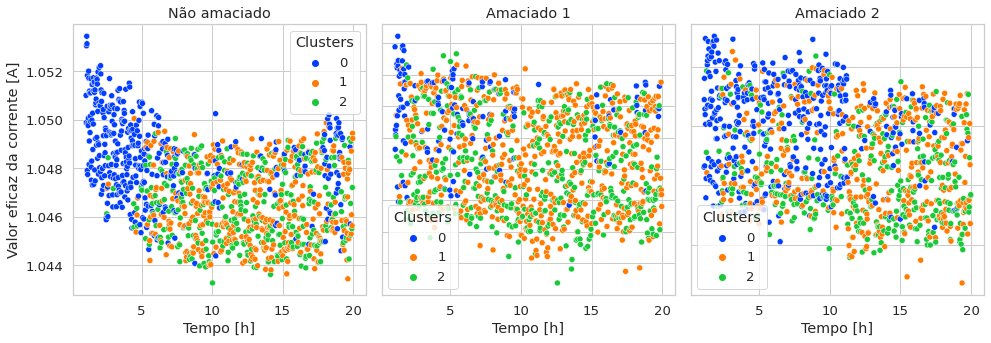

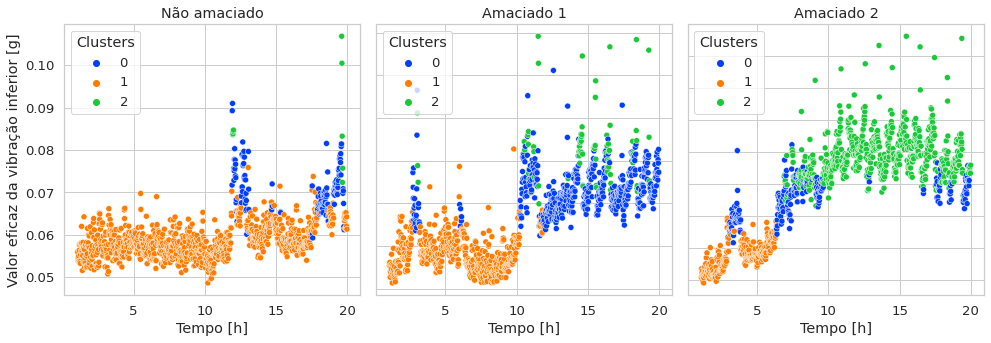

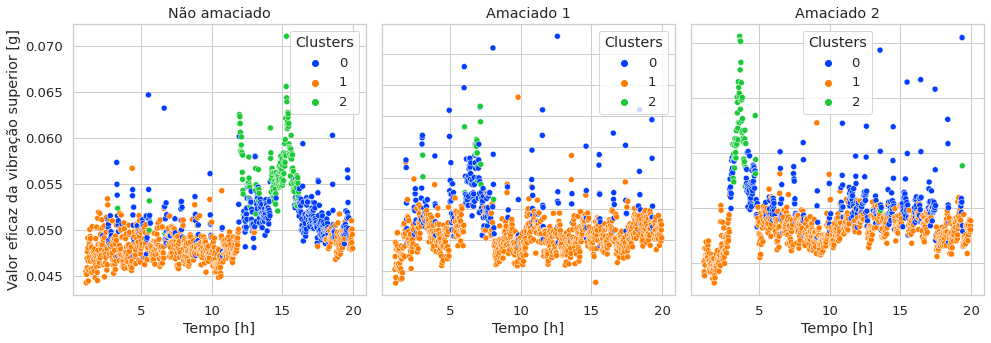

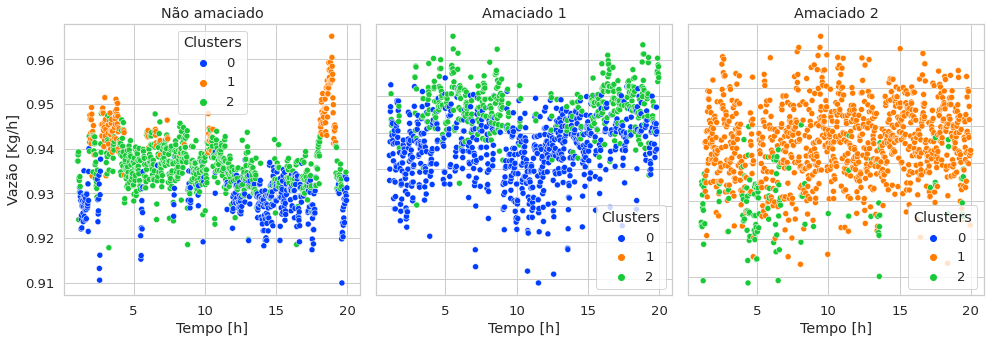

In [ ]:
plot_amostra(corrfim4, "CorrenteRMS", "Valor eficaz da corrente [A]")
plot_amostra(vibinffim4, "VibracaoCalotaInferiorRMS", "Valor eficaz da vibração inferior [g]")
plot_amostra(vibsupfim4, "VibracaoCalotaSuperiorRMS", "Valor eficaz da vibração superior [g]")
plot_amostra(vazfim4, "Vazao", "Vazão [Kg/h]")

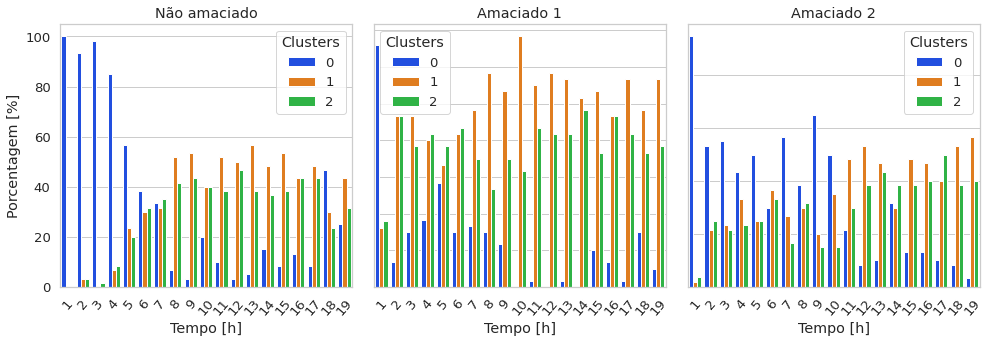

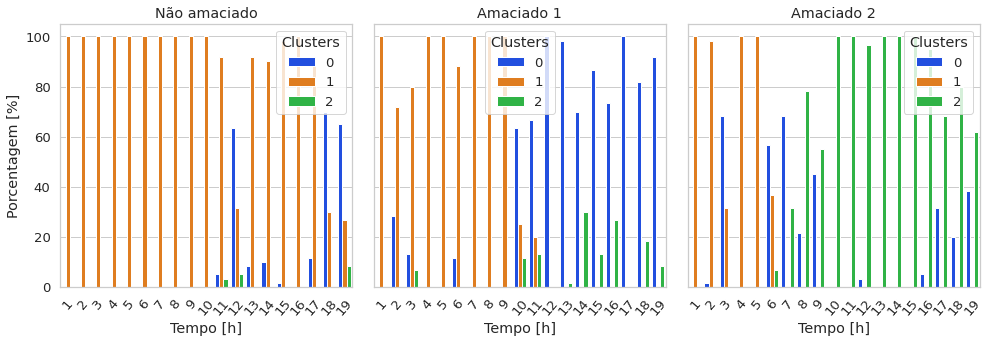

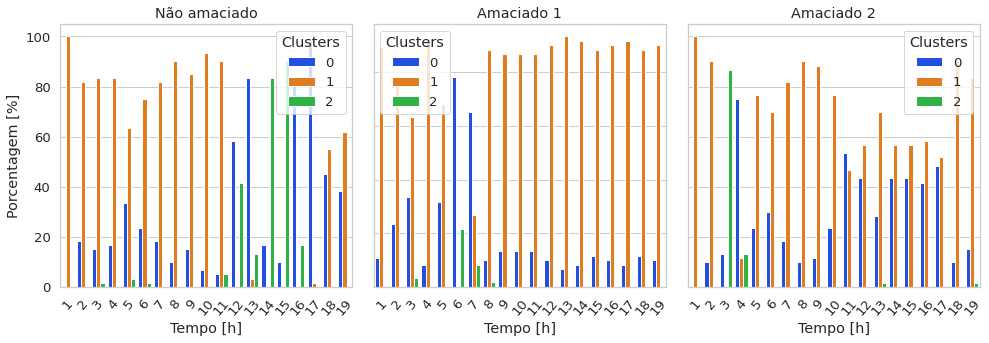

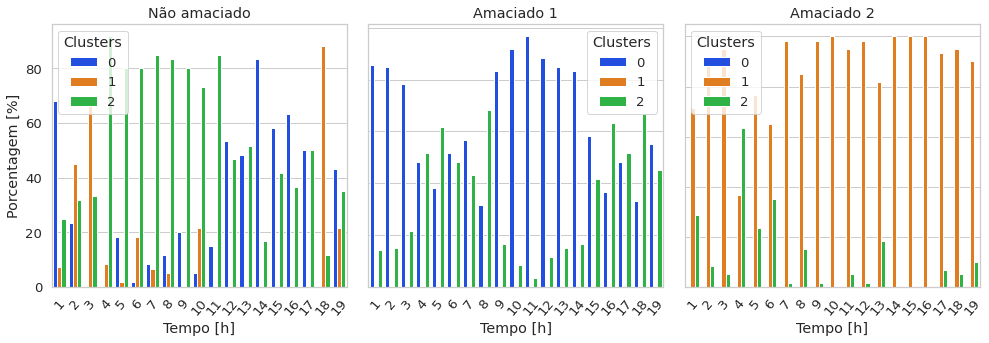

In [ ]:
rel_pct_cluster(corrfim4,"a4_1_N", "a4_2_A","a4_3_A")
rel_pct_cluster(vibinffim4,"a4_1_N", "a4_2_A","a4_3_A")
rel_pct_cluster(vibsupfim4,"a4_1_N", "a4_2_A","a4_3_A")
rel_pct_cluster(vazfim4,"a4_1_N", "a4_2_A","a4_3_A")

In [ ]:
corr3 = aplica_tratamento(a3_1,a3_2,a3_3,"a3", 5, 20)
corrfim3 = dif_medias(corr3,"CorrenteRMS",'a3_m1_1',5,1,1)


vibinf3 = aplica_tratamento(a3_1,a3_2,a3_3,"a3", 5, 20)
vibinffim3 = dif_medias(vibinf3,"VibracaoCalotaInferiorRMS",'a3_m1_1',5,1,1)


vibsup3 = aplica_tratamento(a3_1,a3_2,a3_3,"a3", 5, 20)
vibsupfim3 = dif_medias(vibsup3,"VibracaoCalotaSuperiorRMS",'a3_m1_1',5,1,1)

vaz3 = aplica_tratamento(a3_1,a3_2,a3_3,"a3", 5, 20)
vazfim3 = dif_medias(vaz3,"Vazao",'a3_m1_1',5,1,1)

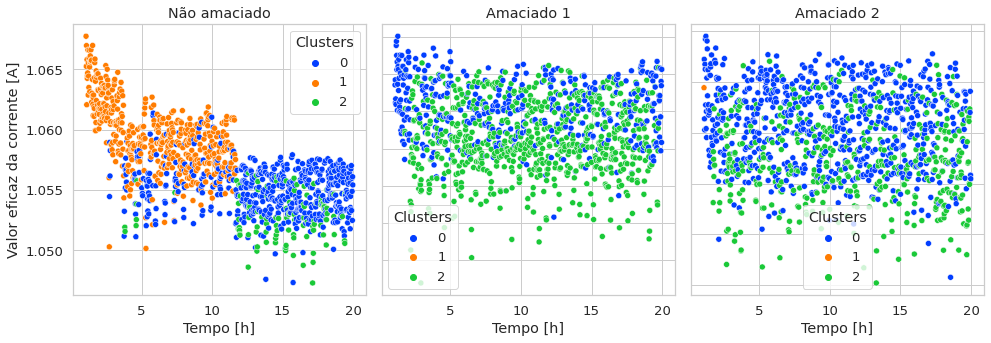

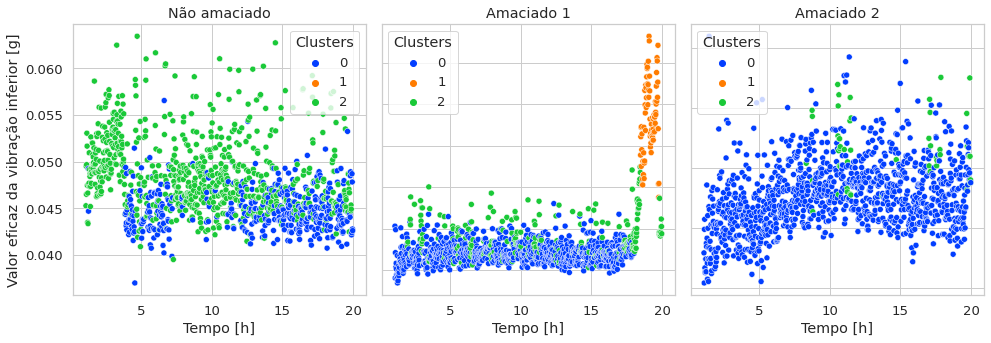

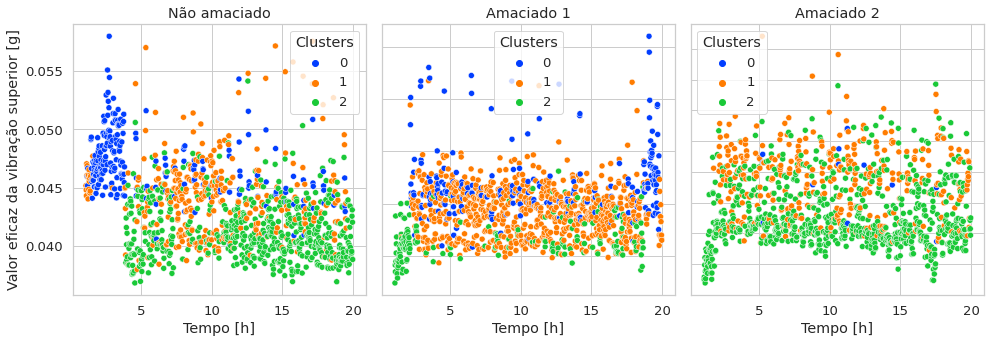

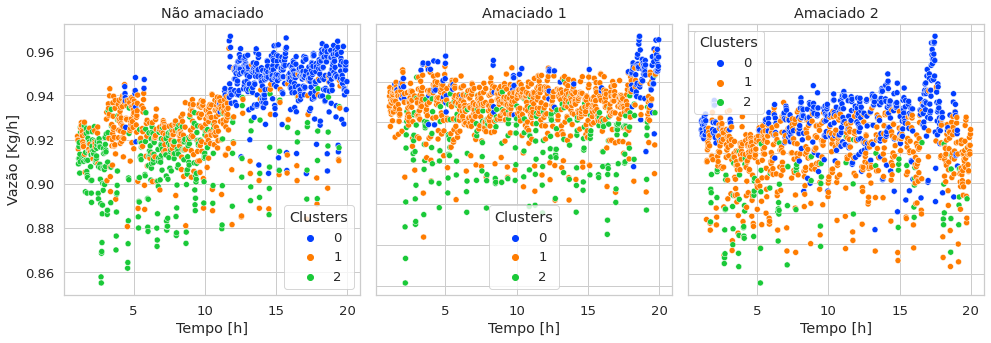

In [ ]:
plot_amostra(corrfim3, "CorrenteRMS", "Valor eficaz da corrente [A]")
plot_amostra(vibinffim3, "VibracaoCalotaInferiorRMS", "Valor eficaz da vibração inferior [g]")
plot_amostra(vibsupfim3, "VibracaoCalotaSuperiorRMS", "Valor eficaz da vibração superior [g]")
plot_amostra(vazfim3, "Vazao", "Vazão [Kg/h]")

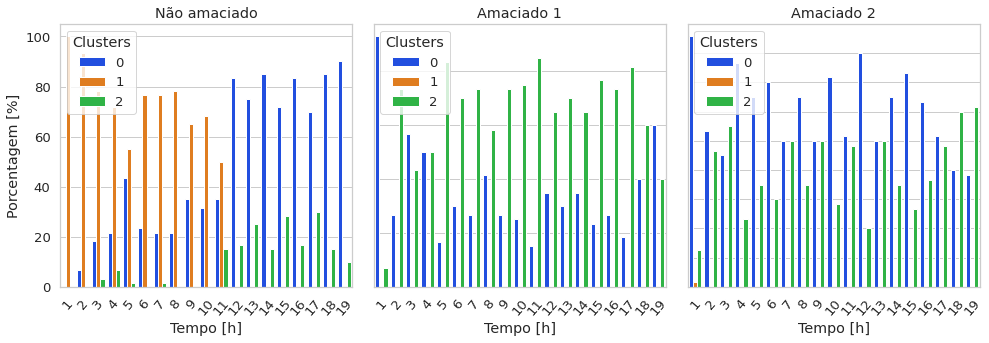

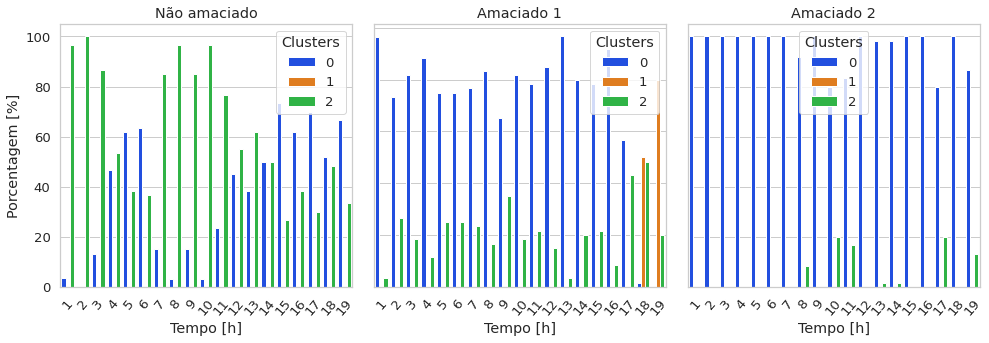

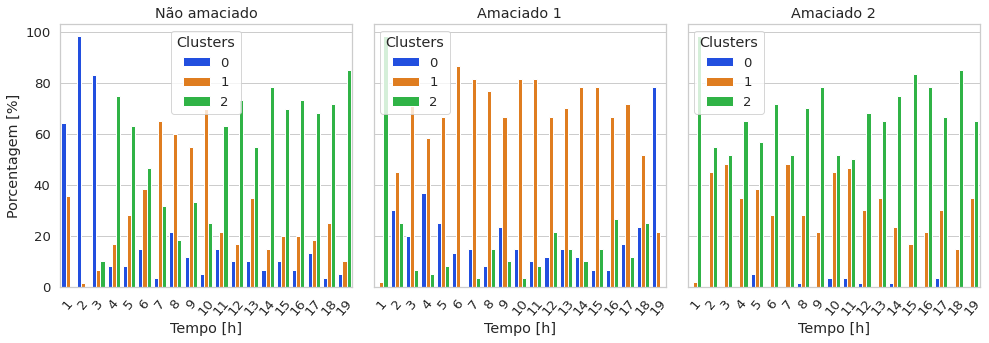

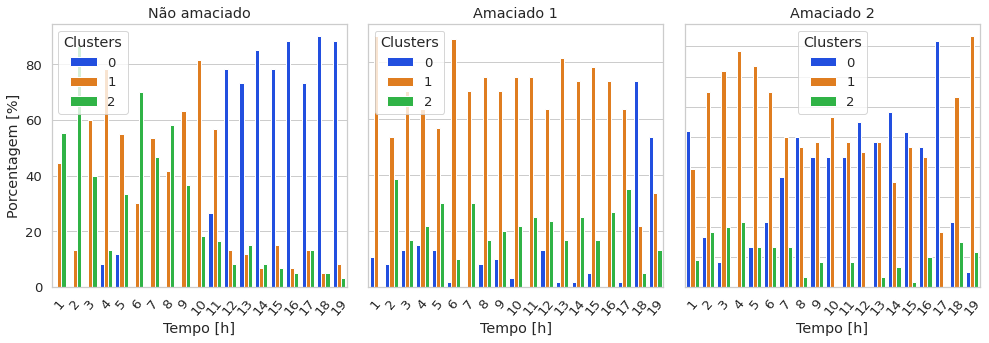

In [ ]:
rel_pct_cluster(corrfim3,"a3_1_N", "a3_2_A","a3_3_A")
rel_pct_cluster(vibinffim3,"a3_1_N", "a3_2_A","a3_3_A")
rel_pct_cluster(vibsupfim3,"a3_1_N", "a3_2_A","a3_3_A")
rel_pct_cluster(vazfim3,"a3_1_N", "a3_2_A","a3_3_A")

In [ ]:
def calcular_wcss(data):
    wcss = []
    for k in range(1,10):
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(X=data)
        data['Clusters']=kmeans.labels_
        wcss.append(kmeans.inertia_)
    return wcss

In [ ]:
amostra = aplica_tratamento(a2_1,a2_2,a2_3,'a2', 1, 20)

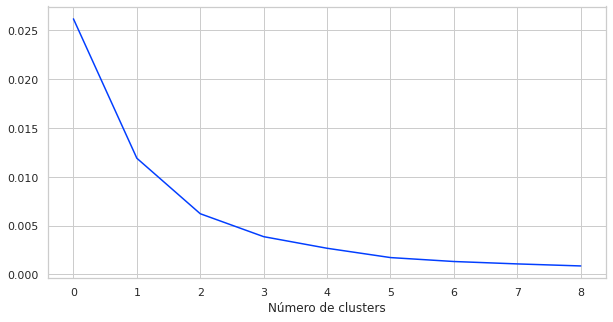

In [ ]:
warnings.simplefilter('ignore')

soma_quadrados = calcular_wcss(amostra[['CorrenteRMS_MA_1']])
plt.figure(figsize=(10,5))
plt.plot(soma_quadrados)
plt.xlabel('Número de clusters')
plt.show()

In [ ]:
pd.DataFrame(soma_quadrados)

,0
0,0.026191
1,0.011908
2,0.006221
3,0.003871
4,0.002682
5,0.001728
6,0.001325
7,0.001079
8,0.000871


In [ ]:
# pastadrive = '/content/drive/My Drive/Nicolas/2021-08 - Cluster dados/'


# pd.DataFrame(soma_quadrados).to_csv(f'{pastadrive}A2_D1_M1_N1_elbow.csv')